In [1]:
import tensorflow 
import keras

In [3]:
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical,plot_model
from keras.datasets import mnist
from keras import utils

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [7]:
x_train.shape,x_test.shape,y_train.shape

((60000, 28, 28), (10000, 28, 28), (60000,))

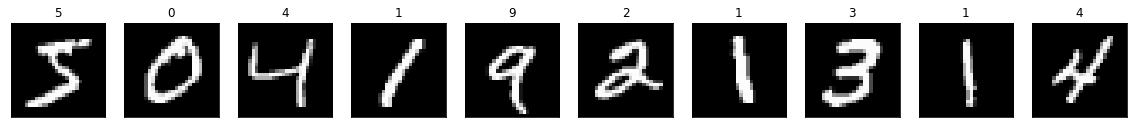

In [17]:
fig,axes  = plt.subplots(ncols=10,sharex=False,sharey=True,figsize=(20,4))
for  i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i],cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [11]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [14]:
y_train.shape

(60000, 10)

In [41]:
# Architecture building 

#sequential : layer type
model = Sequential()

#adding layers
#flatten converts 2d to 1D nmueric format.

#28 X 28 dimensions  converts 2 D to 1D , flattens - 28 X 28 to - 1 X 28*28
model.add(Flatten(input_shape=(28,28))) # 1 X 28*28 , 784 nodes/ inputs 
model.add(Dense(10,activation='sigmoid')) #10 nodes -- hidden layer, Dense means fully connected.
model.add(Dense(5,activation='sigmoid')) #5 nodes/neurons --hidden layer
model.add(Dense(10,activation='softmax')) # 10 nodes -- output layer
#compiling the model

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["acc"])
#softmax used - multi layer classification problem 

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                7850      
                                                                 
 dense_7 (Dense)             (None, 5)                 55        
                                                                 
 dense_8 (Dense)             (None, 10)                60        
                                                                 
Total params: 7,965
Trainable params: 7,965
Non-trainable params: 0
_________________________________________________________________


In [43]:
history = model.fit(x_train,y_train,epochs=30,batch_size=100,validation_data=(x_test,y_test)) #epoch, steps per epoch.

# 32 is default batch sixze = 32 * 1875 steps per epoch. = 60K

Epoch 1/30
600/600 [==============================] - 5s 6ms/step - loss: 1.9557 - acc: 0.3981 - val_loss: 1.6572 - val_acc: 0.4724
Epoch 2/30
600/600 [==============================] - 2s 3ms/step - loss: 1.4821 - acc: 0.5081 - val_loss: 1.3529 - val_acc: 0.5039
Epoch 3/30
600/600 [==============================] - 2s 3ms/step - loss: 1.2627 - acc: 0.5311 - val_loss: 1.1889 - val_acc: 0.5374
Epoch 4/30
600/600 [==============================] - 2s 3ms/step - loss: 1.1414 - acc: 0.5464 - val_loss: 1.0951 - val_acc: 0.5468
Epoch 5/30
600/600 [==============================] - 2s 3ms/step - loss: 1.0698 - acc: 0.5594 - val_loss: 1.0569 - val_acc: 0.5683
Epoch 6/30
600/600 [==============================] - 2s 3ms/step - loss: 1.0258 - acc: 0.5805 - val_loss: 1.0201 - val_acc: 0.5942
Epoch 7/30
600/600 [==============================] - 2s 3ms/step - loss: 0.9905 - acc: 0.6062 - val_loss: 0.9794 - val_acc: 0.6203
Epoch 8/30
600/600 [==============================] - 2s 3ms/step - loss: 0.

In [44]:
model.save('model_handwritting.h5')
#load it in neutron wenbsite

In [45]:
loss = history.history['loss']
acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']

Text(0, 0.5, 'Loss')

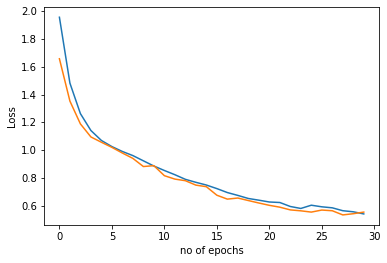

In [46]:
plt.plot(loss,label = 'Train Loss')
plt.plot(val_loss,label = 'Validation Loss')
plt.xlabel('no of epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

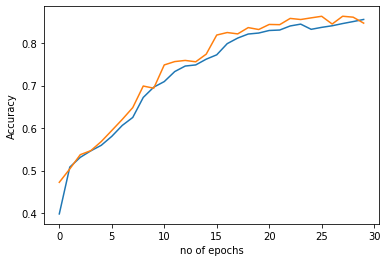

In [47]:
plt.plot(acc,label = 'Train accuracy')
plt.plot(val_acc,label = 'Validation accuracy')
plt.xlabel('no of epochs')
plt.ylabel('Accuracy')